In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("C:\\Users\\user\\2024_ai_test\\data\\HW2\\PhiUSIIL_Phishing_URL_Dataset.csv", index_col=0)
df#전체 데이터 235795개. url관련 정보로 피싱사이트인지 구분하는 데이터셋이다. Binary Classification

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
FILENAME,,,,,,,,,,,,,,,,,,,,,
521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1


In [3]:
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [4]:
df['label'].value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [5]:
df.isnull().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

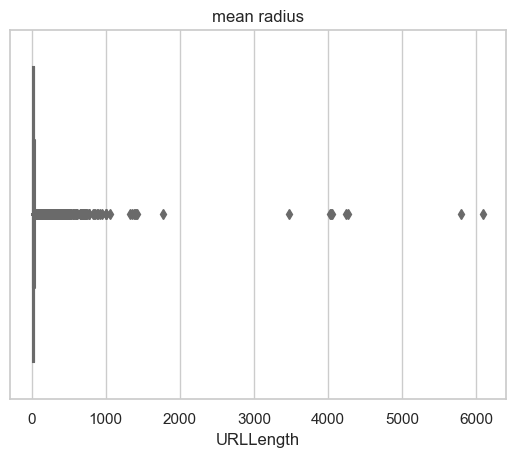

In [6]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='URLLength', data=df, palette="Set3")
plt.title("mean radius")
plt.show()#이상치 상당 수 존재

Text(0.5, 1.0, 'Label Count')

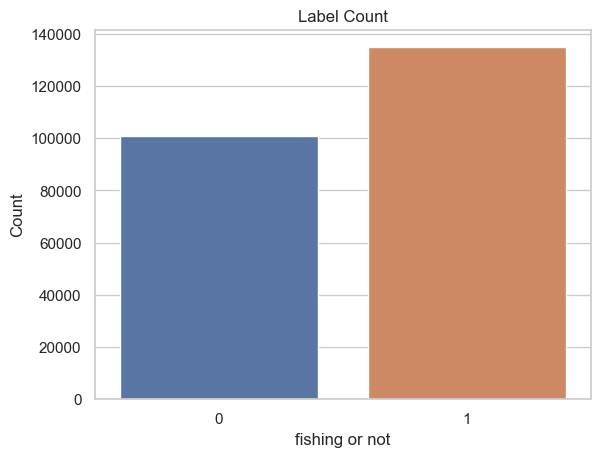

In [7]:
sns.countplot(data=df, x="label")
plt.xlabel("fishing or not")
plt.ylabel("Count")
plt.title("Label Count")

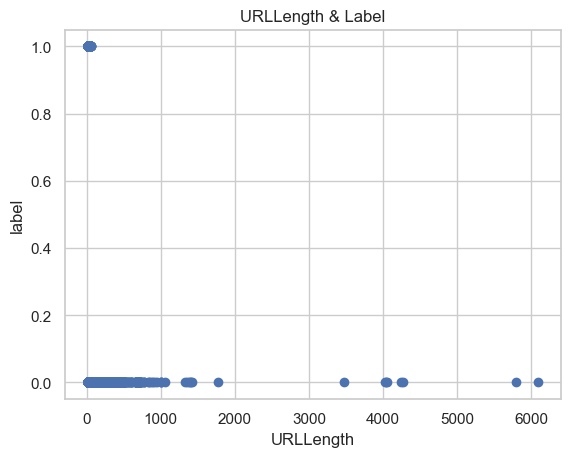

In [8]:
plt.scatter(df['URLLength'], df['label'])
plt.xlabel("URLLength")
plt.ylabel("label")
plt.title("URLLength & Label")
plt.grid(True)
plt.show()#URL주소가 짧으면 피싱일 확률이 높다

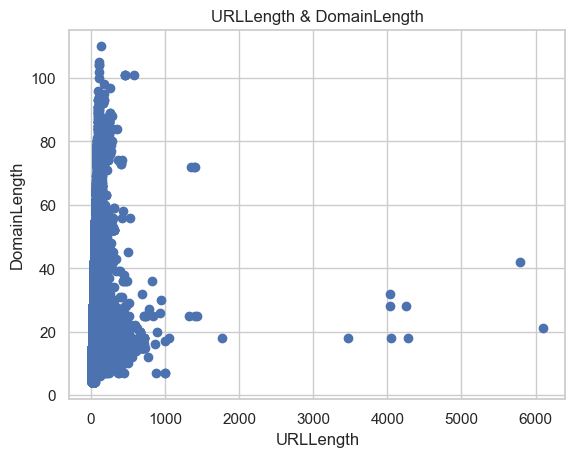

In [9]:
plt.scatter(df['URLLength'], df['DomainLength'])
plt.xlabel("URLLength")
plt.ylabel("DomainLength")
plt.title("URLLength & DomainLength")
plt.grid(True)
plt.show()#URL주소가 짧으면 피싱일 확률이 높다

In [10]:
q1=df['URLLength'].quantile(0.25)
q2=df['URLLength'].quantile(0.5)
q3=df['URLLength'].quantile(0.75)
iqr=q3-q1
iqr

11.0

In [11]:
condition=df['URLLength']>q3+1.5*iqr
df[condition]#이상치 전체 235795 중 약 10%인 22493. 이 이상치를 제거했을 때와 제거하지 않았을 때의 정확도를 비교해보고 싶어졌다

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
FILENAME,,,,,,,,,,,,,,,,,,,,,
8029912.txt,https://ipfs.io/ipfs/qmrvvyr84esa2assw9vvwupqj...,91,ipfs.io,7,0,io,9.669201,1.000000,0.012927,0.041483,...,0,0,0,0,5,6,0,0,2,0
8044158.txt,https://pontosapontamentolu.com/gclid/=/c/?gcl...,140,pontosapontamentolu.com,23,0,com,9.203795,1.000000,0.522907,0.037272,...,0,0,0,0,0,0,0,0,0,0
8080220.txt,https://s3.amazonaws.com/appforest_uf/f1678949...,92,s3.amazonaws.com,16,0,com,19.410431,0.916667,0.522907,0.025063,...,0,0,0,0,0,0,0,0,0,0
mw65296.txt,http://www.maytheday.oss-ap-southeast-2.aliyun...,51,www.maytheday.oss-ap-southeast-2.aliyuncs.com,45,0,com,72.689159,0.297297,0.522907,0.056398,...,0,0,0,0,0,0,0,0,0,0
8053686.txt,http://tkmowpikuk.owl4fsrch.club/vnafvra97w/?q...,64,tkmowpikuk.owl4fsrch.club,25,0,club,14.338629,0.600000,0.000623,0.028541,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oph06235.txt,https://drivesafeamerica.us/wp-admin/dev/a32q0...,99,drivesafeamerica.us,19,0,us,13.430430,1.000000,0.004559,0.044847,...,1,0,0,9,2,0,0,2,1,0
8104399.txt,https://bamcobpl-pt.particul.pro/?utm_term=bpi...,123,bamcobpl-pt.particul.pro,24,0,pro,8.814028,0.450000,0.000556,0.049074,...,0,0,0,0,0,0,0,0,0,0
oph09755.txt,http://kratiknamdev.github.io/instagram-login-...,52,kratiknamdev.github.io,22,0,io,32.488522,0.684211,0.012927,0.056982,...,0,0,0,0,0,0,0,0,0,0


In [12]:
condition_index=df[condition].index
condition_index

Index(['8029912.txt', '8044158.txt', '8080220.txt', 'mw65296.txt',
       '8053686.txt', '8089721.txt', '7536227.txt', '8085660.txt',
       '8002038.txt', '8048476.txt',
       ...
       '8107032.txt', '7999927.txt', '8088367.txt', 'oph12289.txt',
       '8123963.txt', 'oph06235.txt', '8104399.txt', 'oph09755.txt',
       '8091639.txt', '7503962.txt'],
      dtype='object', name='FILENAME', length=22493)

In [13]:
original_df=df
dropped_df=df.drop(condition_index)
dropped_df

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
FILENAME,,,,,,,,,,,,,,,,,,,,,
521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179093.txt,https://www.life-in-ecuador.com,30,www.life-in-ecuador.com,23,0,com,100.0,0.533333,0.522907,0.065126,...,0,0,1,43,1,16,42,0,44,1
660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.0,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.0,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1


In [14]:
X_original=original_df.drop('label', axis=1)
X_dropped=dropped_df.drop("label", axis=1)

In [15]:
y_original=original_df['label']
y_dropped=dropped_df['label']

In [16]:
X_train_org, X_test_org, y_train_org, y_test_org=train_test_split(X_original, y_original, test_size=0.25, random_state=0)
X_train_drp, X_test_drp, y_train_drp, y_test_drp=train_test_split(X_dropped, y_dropped, test_size=0.25, random_state=0)

In [17]:
y_train_org.head()

FILENAME
627137.txt     1
622491.txt     1
mw77309.txt    0
mw54658.txt    0
8088912.txt    0
Name: label, dtype: int64

In [18]:
#from sklearn.preprocessing import StandardScaler

#std_scaler=StandardScaler()
#std_scaler.fit(X_train_org)
#X_train_standard_scaled=std_scaler.transform(X_train_org)
#X_test_standard_scaled=std_scaler.transform(X_test_org)
#X_train_standard_scaled[:2]#문자 데이터라 오류 발생

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
#clf_lr = LogisticRegression(random_state=0)
#clf_lr.fit(X_train_org, y_train_org)

#pred_lr = clf_lr.predict(X_test_org)

#print ("\n--- Logistic Regression Classifier ---")
#print (accuracy_score(y_test_org, pred_lr))
#print (confusion_matrix(y_test_org, pred_lr))#마찬가지의 에러. 현재의 모델은 scaling된 float값만을 처리할 수 있다. 아쉬운대로 URL이 중요하겠지만 숫자 데이터만 사용해서 학습시켜보자.

In [21]:
X_train_org.columns
#URL, Domain, TLD, Title을 삭제

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'],
    

In [22]:
X_train_org.drop(['URL', 'Domain', 'TLD', 'Title'], axis=1)
X_test_org.drop(['URL', 'Domain', 'TLD', 'Title'], axis=1)
X_train_drp.drop(['URL', 'Domain', 'TLD', 'Title'], axis=1)
X_train_drp.drop(['URL', 'Domain', 'TLD', 'Title'], axis=1)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
FILENAME,,,,,,,,,,,,,,,,,,,,,
518460.txt,30,23,0,100.000000,1.000000,0.522907,0.055500,3,1,0,...,0,0,0,1,15,10,17,46,3,5
mw203247.txt,20,14,0,76.790123,1.000000,0.522907,0.057080,3,1,0,...,0,0,0,0,0,0,0,0,0,0
875972.txt,28,21,0,100.000000,1.000000,0.038420,0.063137,3,1,0,...,1,0,0,1,14,2,5,1,3,21
542883.txt,29,22,0,100.000000,1.000000,0.522907,0.062728,3,1,0,...,0,0,0,1,15,3,8,118,9,3
460266.txt,24,17,0,100.000000,1.000000,0.522907,0.055373,3,1,0,...,0,1,0,1,97,5,14,146,0,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137500.txt,26,19,0,100.000000,1.000000,0.012927,0.052246,2,1,0,...,0,1,0,1,26,2,7,73,13,90
653891.txt,30,23,0,100.000000,0.533333,0.522907,0.065339,3,1,0,...,0,0,0,1,159,22,17,351,83,7
mw184250.txt,25,18,0,67.210884,1.000000,0.000255,0.056382,4,1,0,...,0,0,0,1,2,2,0,1,2,4


In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
std_scaler.fit(X_train_org)
X_train_standard_scaled=std_scaler.transform(X_train_org)
X_test_standard_scaled=std_scaler.transform(X_test_org)
X_train_standard_scaled[:2]#위에서 문자 요소를 전부 제거했다고 생각했는데 아직도 String이 남아있다고 뜬다..

ValueError: could not convert string to float: 'https://www.lilybloomflorist.ie'